# **Codig Dojo**: Regresión lineal
## Creado por: Alejandro Acosta

- Fecha de creación: 2022-01-31
- Fecha de modificación: 2022-01-31
- Descripción: Ajustar una regresión lineal y 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 120

In [2]:
df = pd.read_csv('modifiedBostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      1
dtype: int64

In [5]:
df.dropna(how='any', inplace=True)


<AxesSubplot:>

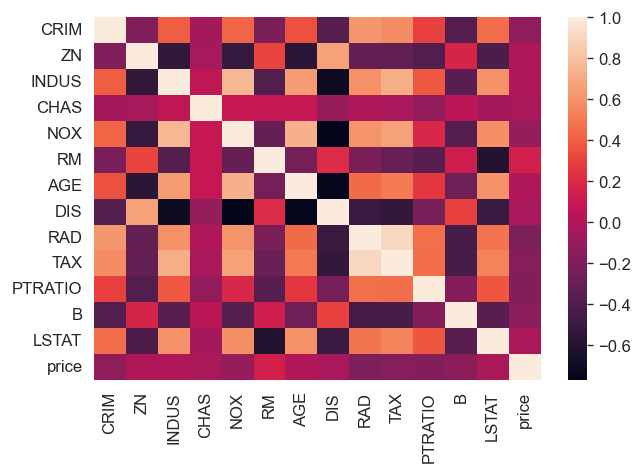

In [6]:
sns.heatmap(df.corr())

In [7]:
priceFilter = df.loc[:, 'price'] < 0 
df = df.loc[~priceFilter, :]

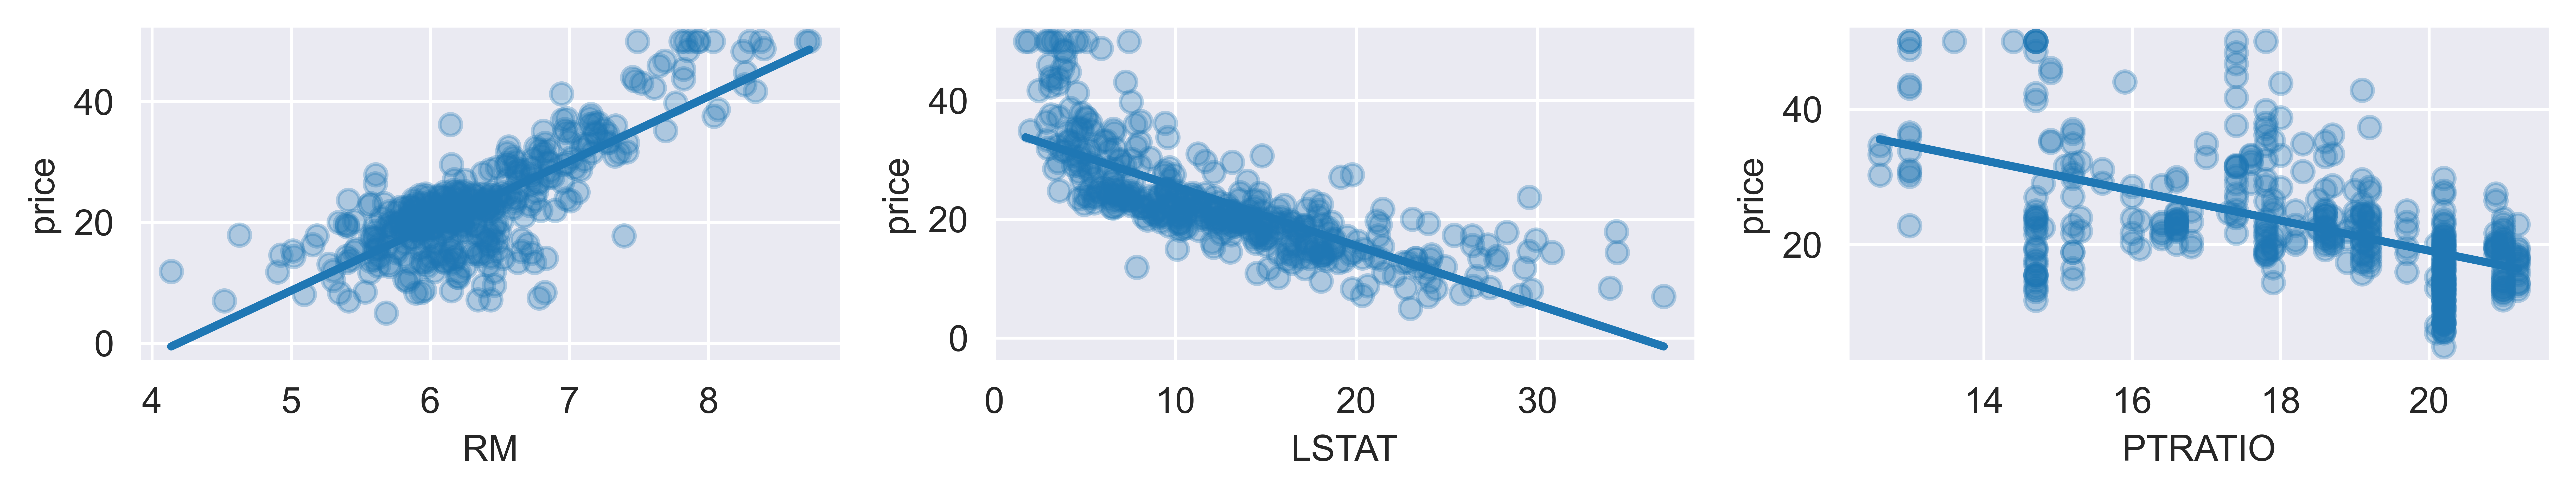

In [8]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)

In [10]:
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values
y = df.loc[:, 'price'].values

In [11]:
reg.fit(X,y)

LinearRegression()

In [12]:
score = reg.score(X, y)
print(score)

0.7848414273030438


In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE


In [16]:
yhat = reg.predict(X)

In [18]:
# R2
r2_score(y,yhat)

0.7848414273030438

In [21]:
# MAE
MAE(y, yhat)

3.2313558816689705

In [22]:
# MSE
MSE(y, yhat)


17.915487275260496

In [23]:
# SQRT(MSE)
np.sqrt(MAE(y, yhat))


1.7975972523535328